In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [23]:
df = pd.read_excel('dataset/cleaned_dataset.xlsx')

In [24]:
df

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.
...,...,...,...,...,...,...,...,...,...,...
1565,34,27,2,1,1,"Senen, Jakarta Pusat, Jakarta D.K.I.",145000000,Senen,Jakarta Pusat,Jakarta D.K.I.
1566,90,36,2,1,1,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",475000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.
1567,90,69,3,2,2,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",900000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.
1568,60,55,2,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",500000001,Palmerah,Jakarta Barat,Jakarta D.K.I.


In [25]:
df_sel = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'lantai', 'harga']]

In [26]:
df_sel

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga
0,60,60,3,2,2,550000000
1,87,85,3,2,2,795000007
2,79,60,2,2,2,589300023
3,144,41,2,1,1,495000000
4,90,60,4,2,1,2100000000
...,...,...,...,...,...,...
1565,34,27,2,1,1,145000000
1566,90,36,2,1,1,475000000
1567,90,69,3,2,2,900000000
1568,60,55,2,2,2,500000001


In [27]:
df_sel.corr(method='pearson')

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga
luas_tanah,1.000000,0.684345,0.558548,0.444889,0.083040,0.688516
luas_bangunan,0.684345,1.000000,0.662562,0.688481,0.469446,0.799228
kamar_tidur,0.558548,0.662562,1.000000,0.712128,0.396833,0.612854
kamar_mandi,0.444889,0.688481,0.712128,1.000000,0.573136,0.619276
lantai,0.083040,0.469446,0.396833,0.573136,1.000000,0.341657
harga,0.688516,0.799228,0.612854,0.619276,0.341657,1.000000


In [28]:
df_sel = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'harga']]

In [29]:
df_sel

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,harga
0,60,60,3,2,550000000
1,87,85,3,2,795000007
2,79,60,2,2,589300023
3,144,41,2,1,495000000
4,90,60,4,2,2100000000
...,...,...,...,...,...
1565,34,27,2,1,145000000
1566,90,36,2,1,475000000
1567,90,69,3,2,900000000
1568,60,55,2,2,500000001


In [30]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [31]:
ks = np.arange(2,11)
bics = []
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(df_sel)
    bics.append(gmm.bic(df_sel))

Text(0.5, 1.0, 'BIC Scores')

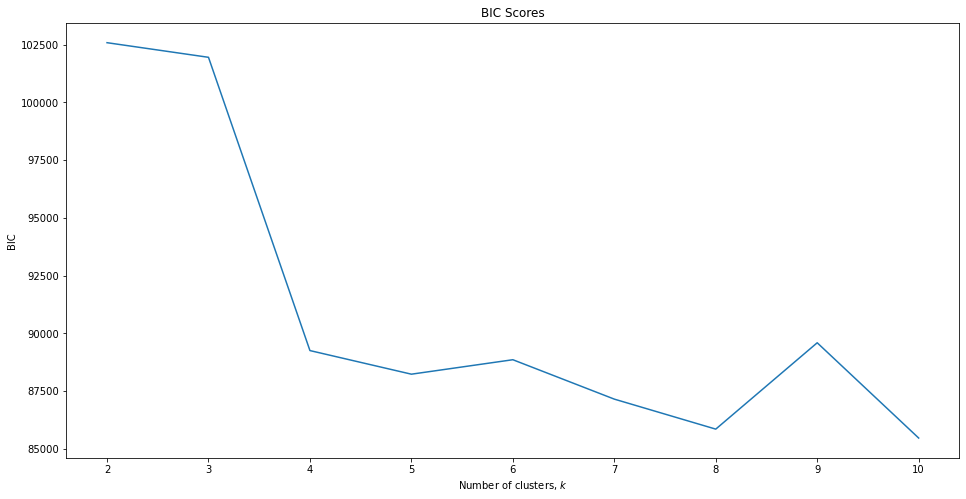

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(ks, bics)
ax.set_xlabel(r'Number of clusters, $k$')
ax.set_ylabel('BIC')
ax.set_xticks(ks)
plt.title("BIC Scores")

C:\Users\MSI\AppData\Local\Temp/ipykernel_17588/1076770611.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


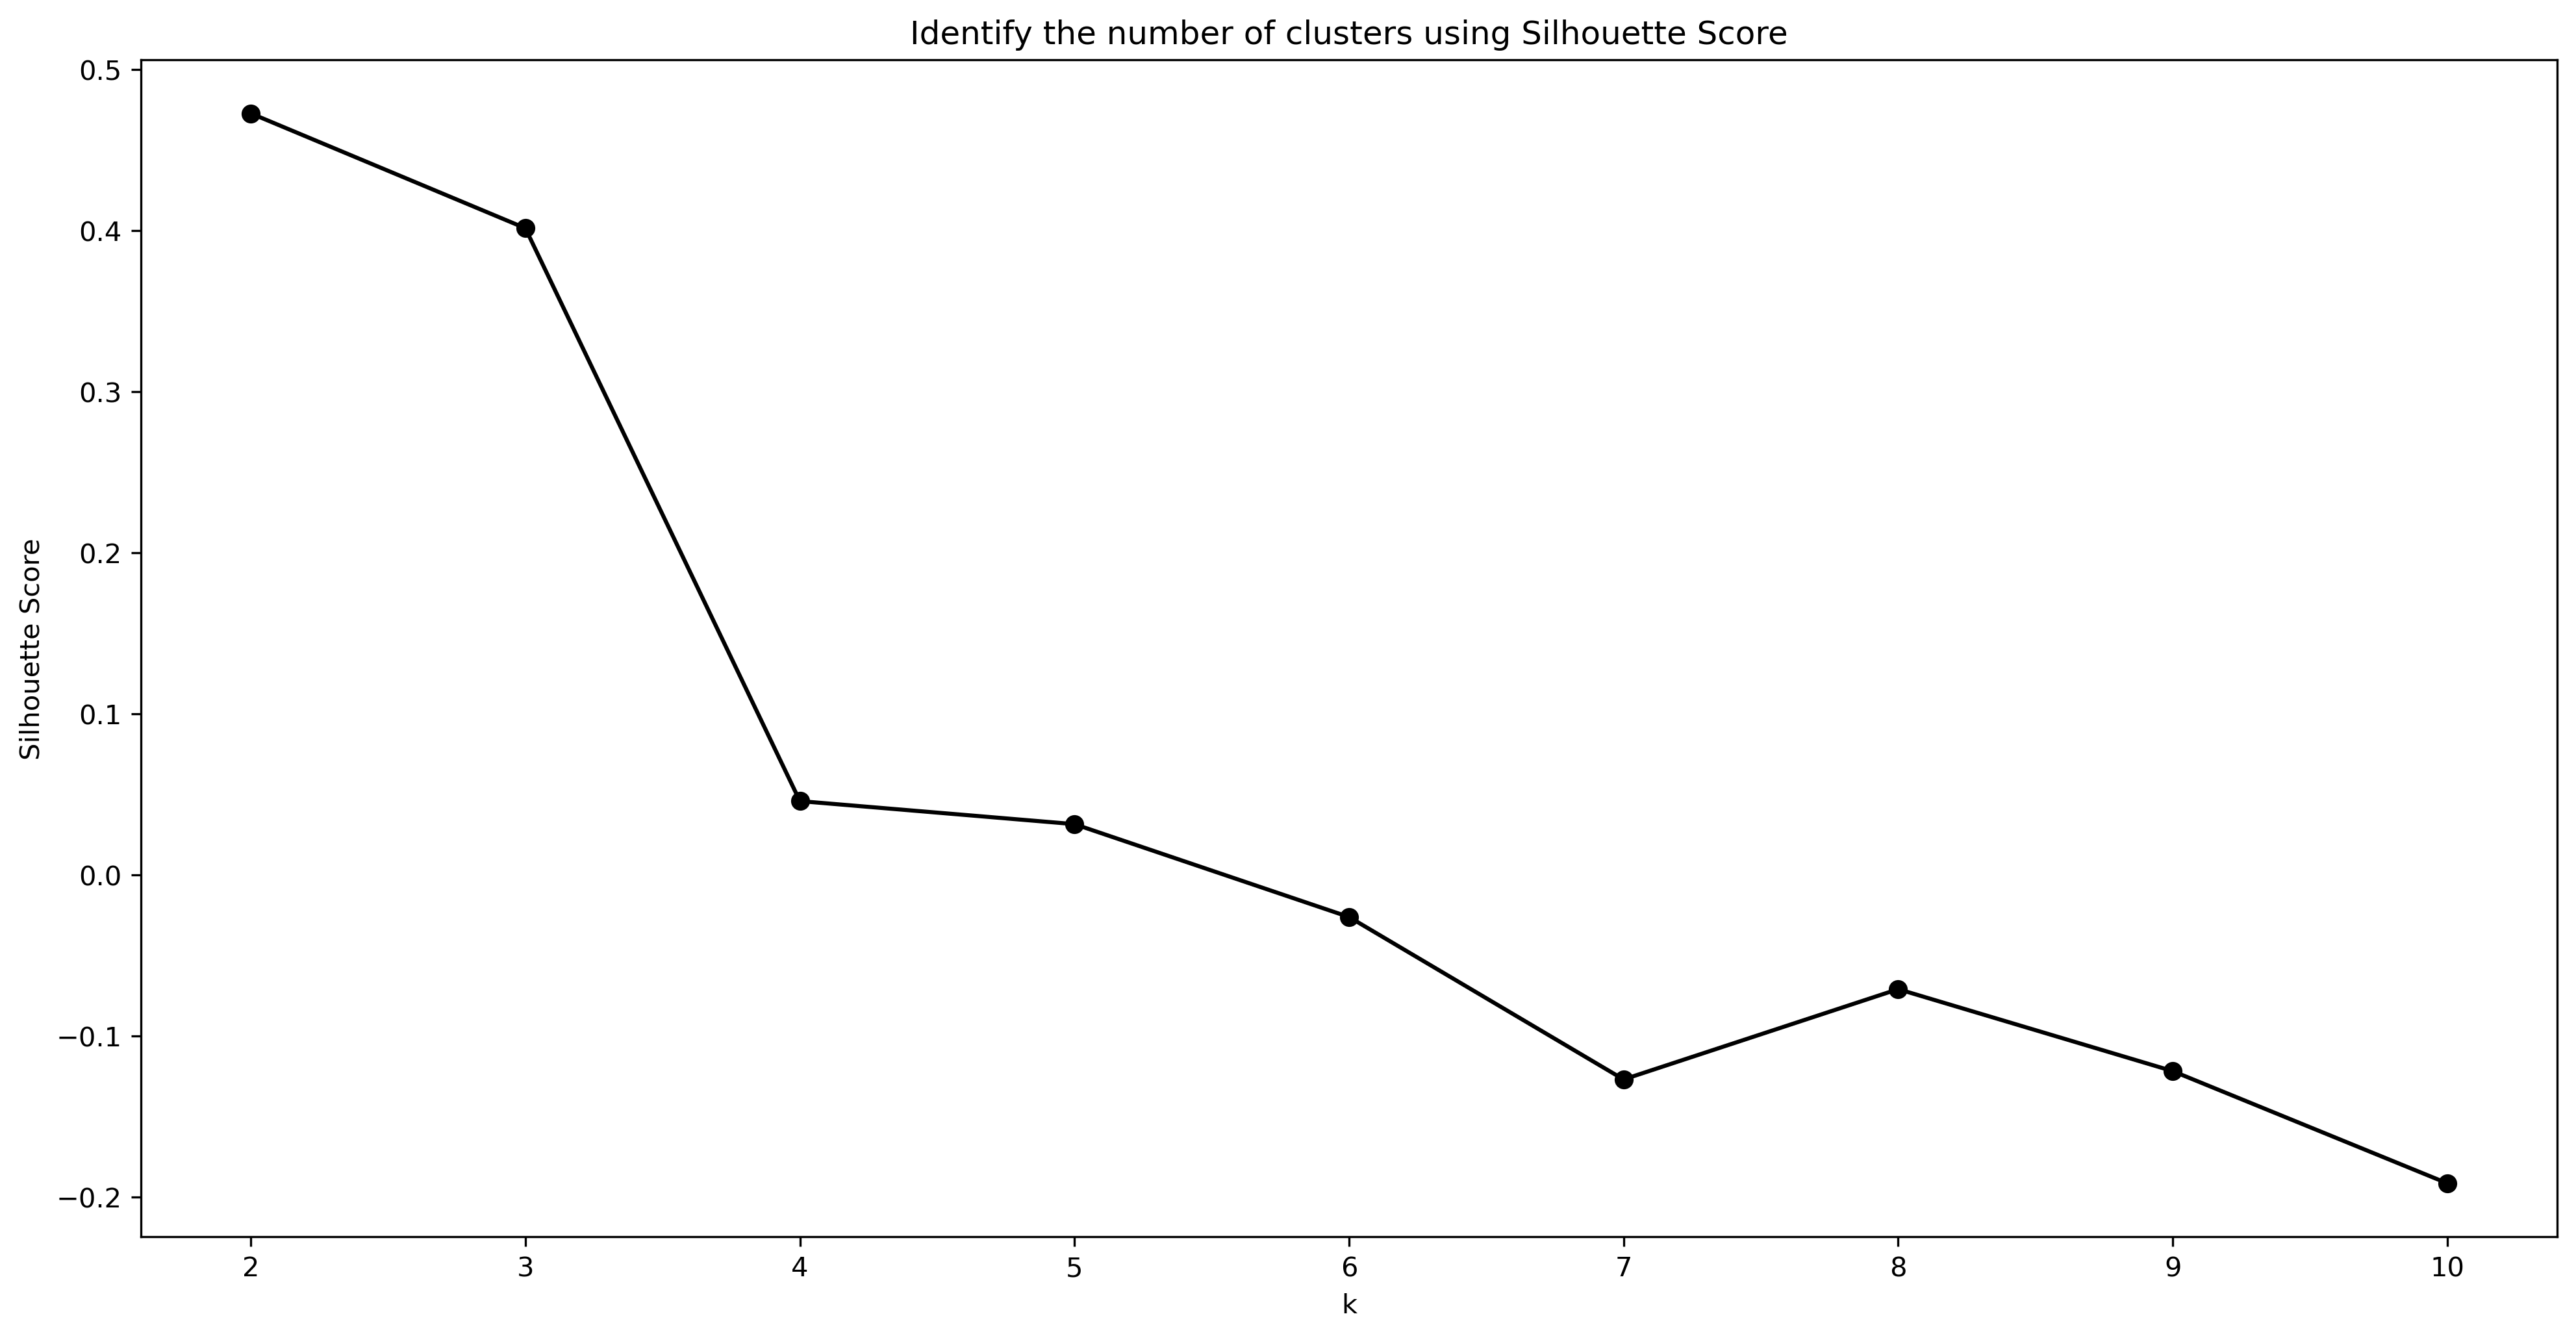

In [33]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = df_sel

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [13]:
model = GaussianMixture(n_components=2, covariance_type='full')
labels = model.fit_predict(X)
silscore = metrics.silhouette_score(X, labels)
print(silscore)

0.5712811346354799


In [14]:
model = GaussianMixture(n_components=6)
model.fit(df_sel)

GaussianMixture(n_components=6)

In [15]:
cluster = model.predict(df_sel)
cluster

array([0, 0, 4, ..., 0, 4, 2], dtype=int64)

In [16]:
silhouette_score(df_sel, cluster)

0.12107463640004151

In [17]:
df['Cluster'] = cluster

In [18]:
df

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi,Cluster
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,0
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.,0
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,4
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,2
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,4
...,...,...,...,...,...,...,...,...,...,...,...
1860,34,27,2,1,1,"Senen, Jakarta Pusat, Jakarta D.K.I.",145000000,Senen,Jakarta Pusat,Jakarta D.K.I.,2
1861,90,36,2,1,1,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",475000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.,2
1862,90,69,3,2,2,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",900000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.,0
1863,60,55,2,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",500000001,Palmerah,Jakarta Barat,Jakarta D.K.I.,4


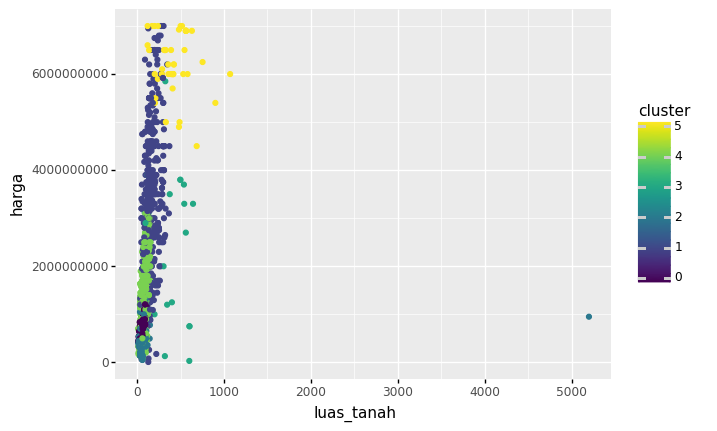

<ggplot: (130022893147)>

In [21]:
from plotnine import ggplot, aes, geom_point
(ggplot(df, aes(x = 'luas_tanah', y = 'harga', color = 'cluster')) + geom_point())

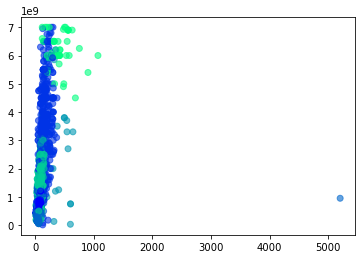

In [20]:
plt.scatter(df['luas_tanah'], df['harga'],  
           c = cluster, cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 